## Instalar pacote DEAP e importar o que for necessário

In [1]:
# https://deap.readthedocs.io/en/master/
!pip install deap

     |████████████████████████████████| 163kB 2.6MB/s 


In [0]:
# Bibliotecas a serem utilizadas
import random
import numpy
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Preparação para Otimização

1.   Função Objetivo
2.   Penalização
3.   Variáveis de Decisão
4.   Operadores



In [0]:
# Função Objetivo
def objective_function(individual):
    return (individual[0]*120)+(individual[1]*160)+(individual[2]*75)+(individual[3]*140)+(individual[4]*140),

In [0]:
# Verificar se indivíduo é válido
def feasible(individual):
  if individual[3] + individual[4] < 800:
    return False
  if individual[3] > 10:
    return False
  if individual[2] < 360:
    return False
  if individual[0] < 180:
    return False
  if individual[0] + individual[1] + individual[2] >= 899:
    return False
  if individual[0] + individual[1] + individual[2] + individual[3] + individual[4] > 1798:
    return False
  return True

In [0]:
# Penalização para indivíduos inválidos
def distance(individual):
  constraint1 = abs(individual[3] + individual[4] + 800)
  constraint2 = abs(individual[3] - 10)
  constraint3 = abs(individual[2] + 360)
  constraint4 = abs(individual[0] + 180)
  constraint5 = abs(individual[0] + individual[1] + individual[2] - 899)
  constraint6 = abs(individual[0] + individual[1] + individual[2] + individual[3] + individual[4] - 1798)  

  return (constraint1 + constraint2 + constraint3 + constraint4 + constraint5 + constraint6)**2

In [348]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))        # função objetivo: nome, tipo(f.o.), peso de cada objetivo (no caso só um objetivo)
creator.create("Individual", list,  fitness=creator.FitnessMax)   # indivíduo

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [0]:
toolbox = base.Toolbox()

# Gerador de atributos inteiros: nome, tipo das variáveis, intervalo (limites inferior e superior)
toolbox.register("attr_int", random.randint, 0, 2000)

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 5)   # 2: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                  # lista de indivíduos

In [0]:
def mutation_gaussian(individual):
    size = int(len(individual))
    gene_idx = random.randint(0, size-1)
    mu = individual[gene_idx]
    rnd = random.gauss(mu, 10)    
    individual[gene_idx] = int(rnd)        
    return individual,

In [0]:
def CrossoverFunction(ind1, ind2, individualGenerator):
  new_ind1, new_ind2 = tools.cxTwoPoint(ind1, ind2)
  if(not(feasible(new_ind1))):
    new_ind1,_ = tools.cxOnePoint(ind1, ind2)
    if(not(feasible(new_ind1))):
      new_ind1,_ = tools.cxUniform(ind1, ind2, indpb=0.2)
      if(not(feasible(new_ind1))):
        tries = 0
        while(not(feasible(new_ind1))):
          if tries >= 100:
            new_ind1 = ind1
            break
          new_ind1 = individualGenerator()
          tries = tries + 1
  if(not(feasible(new_ind2))):
    _,new_ind2 = tools.cxOnePoint(ind1, ind2)
    if(not(feasible(new_ind2))):
      _,new_ind2 = tools.cxUniform(ind1, ind2, indpb=0.2)
      if(not(feasible(new_ind2))):
        tries = 0
        while(not(feasible(new_ind2))):
          if tries >= 100:
            new_ind2 = ind2
            break
          new_ind2 = individualGenerator()
          tries = tries + 1
  return new_ind1,new_ind2

In [0]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 0, distance))                 # penalização para indivíduos inválidos: função de validade, valor retornado da f.o. quando inválido
toolbox.register("mate", CrossoverFunction, individualGenerator=toolbox.individual)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1798, indpb=0.25)
toolbox.register("select", tools.selTournament, tournsize=3)

In [0]:
pop = toolbox.population(n=500)                            # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

## Otimização

In [354]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=2000, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg         	std        	min         	max         
0  	500   	-1.48716e+08	8.36371e+07	-4.56976e+08	-1.05365e+07
1  	281   	-8.60832e+07	4.80968e+07	-3.26706e+08	-1.05365e+07
2  	297   	-5.1562e+07 	3.3338e+07 	-2.20641e+08	-6.6874e+06 
3  	289   	-3.05667e+07	2.35686e+07	-1.70016e+08	-5.8564e+06 
4  	266   	-1.65729e+07	1.07322e+07	-1.03409e+08	-5.8564e+06 
5  	290   	-1.26151e+07	8.87048e+06	-8.85857e+07	-5.8564e+06 
6  	290   	-1.06921e+07	8.81806e+06	-9.28718e+07	-5.68346e+06
7  	260   	-8.93017e+06	9.07657e+06	-1.09035e+08	-5.2992e+06 
8  	301   	-8.32121e+06	9.96116e+06	-1.11007e+08	-5.2992e+06 
9  	292   	-7.82701e+06	1.14459e+07	-1.64506e+08	-5.2992e+06 
10 	284   	-6.82036e+06	6.3141e+06 	-7.4909e+07 	-5.2992e+06 
11 	292   	-7.85519e+06	1.16407e+07	-1.48962e+08	-5.21666e+06
12 	281   	-7.10566e+06	7.61358e+06	-8.00309e+07	-5.21666e+06
13 	276   	-7.23371e+06	1.08435e+07	-1.40683e+08	-5.21666e+06
14 	256   	-7.09588e+06	9.70258e+06	-1.12657e+08	-5.17562e+06
15 	252 

## Resultados

In [355]:
# 5 melhores soluções da última geração
import pandas as pd
pd.DataFrame(pop).head(5)

,0,1,2,3,4
0,1429,305,374,10,172
1,219,305,374,10,890
2,219,305,374,10,890
3,219,305,374,10,890
4,219,305,374,10,890


In [356]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Total da área plantada
print("Área total plantada:")
print(sum(hof[0]))

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo (Lucro da área plantada):")
objective_function(hof[0])

Melhor Indivíduo:
[219, 305, 374, 10, 890]
Área total plantada:
1798
Melhor Resultado da Função Objetivo (Lucro da área plantada):


(229130,)

In [357]:
feasible(hof[0])

True

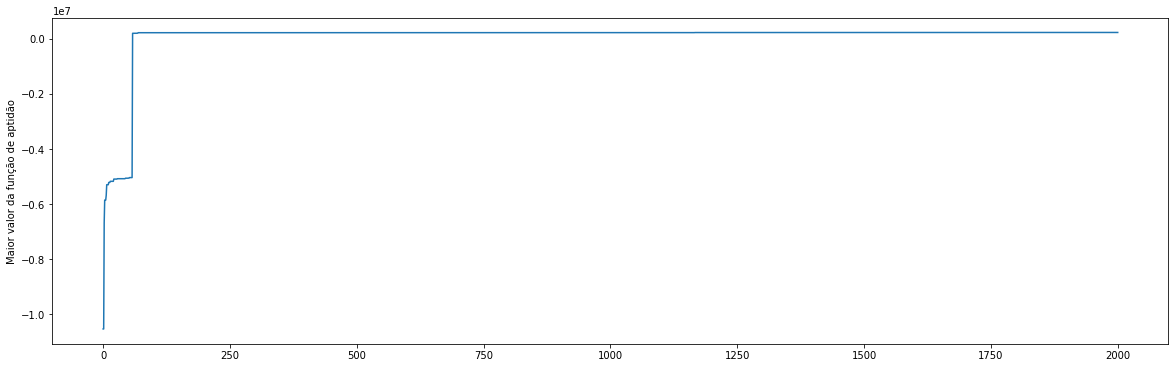

In [358]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
gen, avg = log.select("gen", "max")
plt.plot(gen, avg)
plt.ylabel('Maior valor da função de aptidão')
plt.show()